In [134]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,Conv2DTranspose,MaxPool2D,Input,MaxPooling2D,UpSampling2D
import cv2 as cv
import os

In [114]:
img = cv.imread("pexels-pixabay-2150.jpg",3)

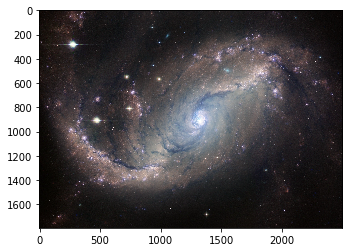

In [115]:
plt.imshow(img)

In [94]:
#preprocessing

# np.random.seed(42)

# SIZE=256
# img_data=[]

# img=cv.imread('pexels-pixabay-2150.jpg', 1)   #Change 1 to 0 for grey images
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
# img=cv.resize(img,(SIZE, SIZE))

# img_data.append(img_to_array(img))
# img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# img_array = img_array.astype('float32') / 255.

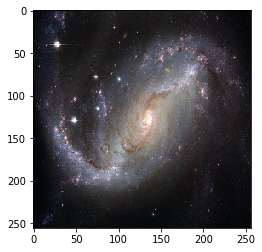

In [105]:
plt.imshow(img)

In [116]:
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)   #opencv gives op in bgr format , we need it in rgb

In [117]:
img.shape

(1794, 2500, 3)

In [118]:
img = cv.resize(img,(256,256))    #converting to lower dim

In [119]:
img.shape

(256, 256, 3)

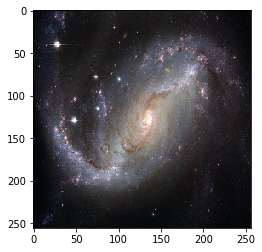

In [120]:
plt.imshow(img)

In [121]:
img = img/256            #scaling

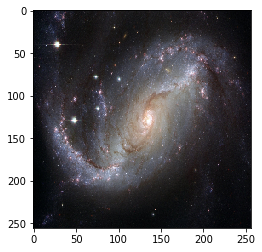

In [122]:
plt.imshow(img)

In [123]:
img.max()

0.99609375

In [124]:
img = img.reshape(-1,256,256,3)         #reshaping to what size nn expect

In [125]:
img.shape

(1, 256, 256, 3)

# use any of the following models, first one is more prefered

In [144]:
i = Input(shape=(256,256,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
     
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8,(2, 2),strides=2)(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8,(2, 2),strides=2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(8,(2, 2),strides=2)(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

model_1 = Model(i,x)

model_1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model_1.summary()


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 8)         0   

In [143]:
i = Input(shape=(256,256,3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
     
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

model_2 = Model(i,x)

model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model_2.summary()


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 8)         0   

In [158]:
model_1.fit(img,img,epochs=5000,shuffle=True)

Epoch 1/5000
1/1 [==============================] - 0s 165ms/step - loss: 0.0020 - accuracy: 0.5986
Epoch 2/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0020 - accuracy: 0.5984
Epoch 3/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0021 - accuracy: 0.5992
Epoch 4/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0020 - accuracy: 0.5983
Epoch 5/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0020 - accuracy: 0.5988
Epoch 6/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0020 - accuracy: 0.5986
Epoch 7/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0020 - accuracy: 0.5986
Epoch 8/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0020 - accuracy: 0.5988
Epoch 9/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0020 - accuracy: 0.5983
Epoch 10/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0020 - accuracy: 0.5992

1/1 [==============================] - 0s 128ms/step - loss: 0.0020 - accuracy: 0.5987
Epoch 83/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0020 - accuracy: 0.5999
Epoch 84/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0020 - accuracy: 0.5994
Epoch 85/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0020 - accuracy: 0.5996
Epoch 86/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0020 - accuracy: 0.5998
Epoch 87/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0020 - accuracy: 0.5991
Epoch 88/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0020 - accuracy: 0.5998
Epoch 89/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0020 - accuracy: 0.5990
Epoch 90/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0020 - accuracy: 0.6004
Epoch 91/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0020 - accuracy: 0.5987
Epoc

1/1 [==============================] - 0s 153ms/step - loss: 0.0020 - accuracy: 0.6005
Epoch 163/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0020 - accuracy: 0.6024
Epoch 164/5000
1/1 [==============================] - 0s 152ms/step - loss: 0.0020 - accuracy: 0.6007
Epoch 165/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0020 - accuracy: 0.6023
Epoch 166/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0020 - accuracy: 0.6006
Epoch 167/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0020 - accuracy: 0.6023
Epoch 168/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0020 - accuracy: 0.6004
Epoch 169/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0019 - accuracy: 0.6023
Epoch 170/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0019 - accuracy: 0.6008
Epoch 171/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0019 - accuracy: 0.

1/1 [==============================] - 0s 123ms/step - loss: 0.0019 - accuracy: 0.6045
Epoch 243/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0019 - accuracy: 0.6019
Epoch 244/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0019 - accuracy: 0.6042
Epoch 245/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0019 - accuracy: 0.6025
Epoch 246/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0019 - accuracy: 0.6034
Epoch 247/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0019 - accuracy: 0.6034
Epoch 248/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0019 - accuracy: 0.6028
Epoch 249/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0019 - accuracy: 0.6039
Epoch 250/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0019 - accuracy: 0.6027
Epoch 251/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0019 - accuracy: 0.

1/1 [==============================] - 0s 131ms/step - loss: 0.0019 - accuracy: 0.6048
Epoch 323/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0019 - accuracy: 0.6059
Epoch 324/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0019 - accuracy: 0.6044
Epoch 325/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0019 - accuracy: 0.6063
Epoch 326/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0019 - accuracy: 0.6040
Epoch 327/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0019 - accuracy: 0.6065
Epoch 328/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0019 - accuracy: 0.6034
Epoch 329/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0019 - accuracy: 0.6066
Epoch 330/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0019 - accuracy: 0.6037
Epoch 331/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0019 - accuracy: 0.

1/1 [==============================] - 0s 128ms/step - loss: 0.0019 - accuracy: 0.6056
Epoch 403/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0019 - accuracy: 0.6078
Epoch 404/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0019 - accuracy: 0.6059
Epoch 405/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0019 - accuracy: 0.6073
Epoch 406/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0018 - accuracy: 0.6064
Epoch 407/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0018 - accuracy: 0.6064
Epoch 408/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6066
Epoch 409/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0018 - accuracy: 0.6061
Epoch 410/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0019 - accuracy: 0.6068
Epoch 411/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0019 - accuracy: 0.

1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6082
Epoch 483/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0018 - accuracy: 0.6070
Epoch 484/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0018 - accuracy: 0.6083
Epoch 485/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0018 - accuracy: 0.6071
Epoch 486/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.0018 - accuracy: 0.6080
Epoch 487/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6071
Epoch 488/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0018 - accuracy: 0.6080
Epoch 489/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0018 - accuracy: 0.6070
Epoch 490/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0018 - accuracy: 0.6080
Epoch 491/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 133ms/step - loss: 0.0018 - accuracy: 0.6073
Epoch 563/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6081
Epoch 564/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0018 - accuracy: 0.6074
Epoch 565/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6081
Epoch 566/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0018 - accuracy: 0.6074
Epoch 567/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6084
Epoch 568/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0018 - accuracy: 0.6075
Epoch 569/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6085
Epoch 570/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0018 - accuracy: 0.6074
Epoch 571/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 126ms/step - loss: 0.0019 - accuracy: 0.6066
Epoch 643/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0019 - accuracy: 0.6113
Epoch 644/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0019 - accuracy: 0.6063
Epoch 645/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0019 - accuracy: 0.6112
Epoch 646/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0018 - accuracy: 0.6070
Epoch 647/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0018 - accuracy: 0.6100
Epoch 648/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0018 - accuracy: 0.6088
Epoch 649/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0018 - accuracy: 0.6086
Epoch 650/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0018 - accuracy: 0.6102
Epoch 651/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 136ms/step - loss: 0.0018 - accuracy: 0.6100
Epoch 723/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0018 - accuracy: 0.6101
Epoch 724/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6093
Epoch 725/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0018 - accuracy: 0.6105
Epoch 726/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0018 - accuracy: 0.6092
Epoch 727/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6109
Epoch 728/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0018 - accuracy: 0.6092
Epoch 729/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6108
Epoch 730/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0018 - accuracy: 0.6092
Epoch 731/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 129ms/step - loss: 0.0017 - accuracy: 0.6094
Epoch 803/5000
1/1 [==============================] - 0s 123ms/step - loss: 0.0017 - accuracy: 0.6104
Epoch 804/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0017 - accuracy: 0.6097
Epoch 805/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6101
Epoch 806/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0017 - accuracy: 0.6103
Epoch 807/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0017 - accuracy: 0.6100
Epoch 808/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0017 - accuracy: 0.6105
Epoch 809/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0017 - accuracy: 0.6098
Epoch 810/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0017 - accuracy: 0.6105
Epoch 811/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0017 - accuracy: 0.

1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6105
Epoch 883/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6110
Epoch 884/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0017 - accuracy: 0.6100
Epoch 885/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0017 - accuracy: 0.6110
Epoch 886/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6098
Epoch 887/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0017 - accuracy: 0.6112
Epoch 888/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6103
Epoch 889/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6109
Epoch 890/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6109
Epoch 891/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0017 - accuracy: 0.

1/1 [==============================] - 0s 130ms/step - loss: 0.0018 - accuracy: 0.6097
Epoch 963/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0018 - accuracy: 0.6128
Epoch 964/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0018 - accuracy: 0.6094
Epoch 965/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0018 - accuracy: 0.6127
Epoch 966/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0018 - accuracy: 0.6096
Epoch 967/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6119
Epoch 968/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0017 - accuracy: 0.6107
Epoch 969/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6115
Epoch 970/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0017 - accuracy: 0.6120
Epoch 971/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0017 - accuracy: 0.

1/1 [==============================] - 0s 136ms/step - loss: 0.0017 - accuracy: 0.6122
Epoch 1043/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.0017 - accuracy: 0.6121
Epoch 1044/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0017 - accuracy: 0.6121
Epoch 1045/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0017 - accuracy: 0.6120
Epoch 1046/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0017 - accuracy: 0.6122
Epoch 1047/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0017 - accuracy: 0.6120
Epoch 1048/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0017 - accuracy: 0.6121
Epoch 1049/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0017 - accuracy: 0.6117
Epoch 1050/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0017 - accuracy: 0.6121
Epoch 1051/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0017 - acc

1/1 [==============================] - 0s 137ms/step - loss: 0.0017 - accuracy: 0.6125
Epoch 1122/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0017 - accuracy: 0.6126
Epoch 1123/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0017 - accuracy: 0.6126
Epoch 1124/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0017 - accuracy: 0.6125
Epoch 1125/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6127
Epoch 1126/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0017 - accuracy: 0.6125
Epoch 1127/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0017 - accuracy: 0.6127
Epoch 1128/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0017 - accuracy: 0.6124
Epoch 1129/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0017 - accuracy: 0.6128
Epoch 1130/5000
1/1 [==============================] - 0s 150ms/step - loss: 0.0017 - acc

1/1 [==============================] - 0s 148ms/step - loss: 0.0017 - accuracy: 0.6131
Epoch 1201/5000
1/1 [==============================] - 0s 150ms/step - loss: 0.0017 - accuracy: 0.6137
Epoch 1202/5000
1/1 [==============================] - 0s 160ms/step - loss: 0.0017 - accuracy: 0.6126
Epoch 1203/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.0017 - accuracy: 0.6142
Epoch 1204/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0017 - accuracy: 0.6124
Epoch 1205/5000
1/1 [==============================] - 0s 152ms/step - loss: 0.0017 - accuracy: 0.6141
Epoch 1206/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0017 - accuracy: 0.6133
Epoch 1207/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0017 - accuracy: 0.6134
Epoch 1208/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0017 - accuracy: 0.6143
Epoch 1209/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0017 - acc

1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6144
Epoch 1280/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0017 - accuracy: 0.6162
Epoch 1281/5000
1/1 [==============================] - 0s 153ms/step - loss: 0.0017 - accuracy: 0.6138
Epoch 1282/5000
1/1 [==============================] - 0s 152ms/step - loss: 0.0017 - accuracy: 0.6166
Epoch 1283/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0017 - accuracy: 0.6138
Epoch 1284/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0017 - accuracy: 0.6159
Epoch 1285/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0016 - accuracy: 0.6147
Epoch 1286/5000
1/1 [==============================] - 0s 117ms/step - loss: 0.0016 - accuracy: 0.6148
Epoch 1287/5000
1/1 [==============================] - 0s 148ms/step - loss: 0.0016 - accuracy: 0.6152
Epoch 1288/5000
1/1 [==============================] - 0s 146ms/step - loss: 0.0017 - acc

1/1 [==============================] - 0s 134ms/step - loss: 0.0017 - accuracy: 0.6151
Epoch 1359/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0017 - accuracy: 0.6173
Epoch 1360/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0017 - accuracy: 0.6148
Epoch 1361/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.0017 - accuracy: 0.6170
Epoch 1362/5000
1/1 [==============================] - 0s 146ms/step - loss: 0.0017 - accuracy: 0.6150
Epoch 1363/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0016 - accuracy: 0.6165
Epoch 1364/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0016 - accuracy: 0.6156
Epoch 1365/5000
1/1 [==============================] - 0s 153ms/step - loss: 0.0016 - accuracy: 0.6164
Epoch 1366/5000
1/1 [==============================] - 0s 159ms/step - loss: 0.0016 - accuracy: 0.6158
Epoch 1367/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - accuracy: 0.6178
Epoch 1438/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - accuracy: 0.6181
Epoch 1439/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6180
Epoch 1440/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6177
Epoch 1441/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0016 - accuracy: 0.6180
Epoch 1442/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6175
Epoch 1443/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0016 - accuracy: 0.6180
Epoch 1444/5000
1/1 [==============================] - 0s 153ms/step - loss: 0.0016 - accuracy: 0.6174
Epoch 1445/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.0016 - accuracy: 0.6180
Epoch 1446/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 135ms/step - loss: 0.0016 - accuracy: 0.6193
Epoch 1517/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - accuracy: 0.6185
Epoch 1518/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0016 - accuracy: 0.6191
Epoch 1519/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6188
Epoch 1520/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0016 - accuracy: 0.6192
Epoch 1521/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0016 - accuracy: 0.6192
Epoch 1522/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0016 - accuracy: 0.6191
Epoch 1523/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0016 - accuracy: 0.6192
Epoch 1524/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0016 - accuracy: 0.6193
Epoch 1525/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 148ms/step - loss: 0.0016 - accuracy: 0.6192
Epoch 1596/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0016 - accuracy: 0.6216
Epoch 1597/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0016 - accuracy: 0.6192
Epoch 1598/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0016 - accuracy: 0.6214
Epoch 1599/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0016 - accuracy: 0.6199
Epoch 1600/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0016 - accuracy: 0.6209
Epoch 1601/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0016 - accuracy: 0.6205
Epoch 1602/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0016 - accuracy: 0.6207
Epoch 1603/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0016 - accuracy: 0.6208
Epoch 1604/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - accuracy: 0.6227
Epoch 1675/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0016 - accuracy: 0.6216
Epoch 1676/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6239
Epoch 1677/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0016 - accuracy: 0.6214
Epoch 1678/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0016 - accuracy: 0.6238
Epoch 1679/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6217
Epoch 1680/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6229
Epoch 1681/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0016 - accuracy: 0.6223
Epoch 1682/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - accuracy: 0.6220
Epoch 1683/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6242
Epoch 1754/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - accuracy: 0.6244
Epoch 1755/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6254
Epoch 1756/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0016 - accuracy: 0.6243
Epoch 1757/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0016 - accuracy: 0.6261
Epoch 1758/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0016 - accuracy: 0.6241
Epoch 1759/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0016 - accuracy: 0.6262
Epoch 1760/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6238
Epoch 1761/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6253
Epoch 1762/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 136ms/step - loss: 0.0016 - accuracy: 0.6263
Epoch 1833/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0016 - accuracy: 0.6276
Epoch 1834/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0016 - accuracy: 0.6260
Epoch 1835/5000
1/1 [==============================] - 0s 150ms/step - loss: 0.0016 - accuracy: 0.6282
Epoch 1836/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0016 - accuracy: 0.6259
Epoch 1837/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0016 - accuracy: 0.6286
Epoch 1838/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0016 - accuracy: 0.6256
Epoch 1839/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0017 - accuracy: 0.6288
Epoch 1840/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0017 - accuracy: 0.6252
Epoch 1841/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6308
Epoch 1912/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0016 - accuracy: 0.6293
Epoch 1913/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6308
Epoch 1914/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6296
Epoch 1915/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0016 - accuracy: 0.6308
Epoch 1916/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6298
Epoch 1917/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0016 - accuracy: 0.6308
Epoch 1918/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0016 - accuracy: 0.6300
Epoch 1919/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0016 - accuracy: 0.6308
Epoch 1920/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 141ms/step - loss: 0.0015 - accuracy: 0.6334
Epoch 1991/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0015 - accuracy: 0.6334
Epoch 1992/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - accuracy: 0.6335
Epoch 1993/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0015 - accuracy: 0.6334
Epoch 1994/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0016 - accuracy: 0.6339
Epoch 1995/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6334
Epoch 1996/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0016 - accuracy: 0.6342
Epoch 1997/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0016 - accuracy: 0.6335
Epoch 1998/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0016 - accuracy: 0.6344
Epoch 1999/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0016 - acc

1/1 [==============================] - 0s 132ms/step - loss: 0.0015 - accuracy: 0.6380
Epoch 2070/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6374
Epoch 2071/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0015 - accuracy: 0.6377
Epoch 2072/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0016 - accuracy: 0.6370
Epoch 2073/5000
1/1 [==============================] - 0s 120ms/step - loss: 0.0016 - accuracy: 0.6377
Epoch 2074/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - accuracy: 0.6370
Epoch 2075/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6378
Epoch 2076/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0015 - accuracy: 0.6373
Epoch 2077/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6379
Epoch 2078/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 131ms/step - loss: 0.0015 - accuracy: 0.6410
Epoch 2149/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0015 - accuracy: 0.6419
Epoch 2150/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6413
Epoch 2151/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6418
Epoch 2152/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0015 - accuracy: 0.6415
Epoch 2153/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0015 - accuracy: 0.6419
Epoch 2154/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0015 - accuracy: 0.6418
Epoch 2155/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0015 - accuracy: 0.6421
Epoch 2156/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0015 - accuracy: 0.6419
Epoch 2157/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - accuracy: 0.6468
Epoch 2228/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0015 - accuracy: 0.6457
Epoch 2229/5000
1/1 [==============================] - 0s 150ms/step - loss: 0.0015 - accuracy: 0.6470
Epoch 2230/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0015 - accuracy: 0.6458
Epoch 2231/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.0015 - accuracy: 0.6473
Epoch 2232/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0015 - accuracy: 0.6459
Epoch 2233/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0015 - accuracy: 0.6474
Epoch 2234/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0015 - accuracy: 0.6460
Epoch 2235/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0015 - accuracy: 0.6477
Epoch 2236/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 133ms/step - loss: 0.0015 - accuracy: 0.6510
Epoch 2307/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6515
Epoch 2308/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0015 - accuracy: 0.6516
Epoch 2309/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0015 - accuracy: 0.6517
Epoch 2310/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.0015 - accuracy: 0.6519
Epoch 2311/5000
1/1 [==============================] - 0s 147ms/step - loss: 0.0015 - accuracy: 0.6516
Epoch 2312/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0015 - accuracy: 0.6521
Epoch 2313/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0015 - accuracy: 0.6512
Epoch 2314/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0015 - accuracy: 0.6521
Epoch 2315/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 124ms/step - loss: 0.0015 - accuracy: 0.6569
Epoch 2386/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0015 - accuracy: 0.6562
Epoch 2387/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0015 - accuracy: 0.6571
Epoch 2388/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0015 - accuracy: 0.6561
Epoch 2389/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0015 - accuracy: 0.6574
Epoch 2390/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0015 - accuracy: 0.6561
Epoch 2391/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6578
Epoch 2392/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0015 - accuracy: 0.6561
Epoch 2393/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6579
Epoch 2394/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - accuracy: 0.6627
Epoch 2465/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0015 - accuracy: 0.6619
Epoch 2466/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6623
Epoch 2467/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6624
Epoch 2468/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6621
Epoch 2469/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0015 - accuracy: 0.6630
Epoch 2470/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0015 - accuracy: 0.6623
Epoch 2471/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6631
Epoch 2472/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0015 - accuracy: 0.6626
Epoch 2473/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 136ms/step - loss: 0.0015 - accuracy: 0.6687
Epoch 2544/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0015 - accuracy: 0.6680
Epoch 2545/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6686
Epoch 2546/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0015 - accuracy: 0.6676
Epoch 2547/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0015 - accuracy: 0.6682
Epoch 2548/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6674
Epoch 2549/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6684
Epoch 2550/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - accuracy: 0.6678
Epoch 2551/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0015 - accuracy: 0.6691
Epoch 2552/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6747
Epoch 2623/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0014 - accuracy: 0.6742
Epoch 2624/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6751
Epoch 2625/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - accuracy: 0.6743
Epoch 2626/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6755
Epoch 2627/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0015 - accuracy: 0.6742
Epoch 2628/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0015 - accuracy: 0.6758
Epoch 2629/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0015 - accuracy: 0.6743
Epoch 2630/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0015 - accuracy: 0.6760
Epoch 2631/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 136ms/step - loss: 0.0014 - accuracy: 0.6824
Epoch 2702/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0014 - accuracy: 0.6820
Epoch 2703/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0014 - accuracy: 0.6825
Epoch 2704/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6827
Epoch 2705/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.6824
Epoch 2706/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - accuracy: 0.6829
Epoch 2707/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6824
Epoch 2708/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0014 - accuracy: 0.6832
Epoch 2709/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0014 - accuracy: 0.6823
Epoch 2710/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6885
Epoch 2781/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6891
Epoch 2782/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0014 - accuracy: 0.6886
Epoch 2783/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - accuracy: 0.6894
Epoch 2784/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0014 - accuracy: 0.6886
Epoch 2785/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - accuracy: 0.6901
Epoch 2786/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0014 - accuracy: 0.6884
Epoch 2787/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0014 - accuracy: 0.6906
Epoch 2788/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0014 - accuracy: 0.6881
Epoch 2789/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6957
Epoch 2860/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0014 - accuracy: 0.6937
Epoch 2861/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - accuracy: 0.6967
Epoch 2862/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.6940
Epoch 2863/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.6973
Epoch 2864/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0014 - accuracy: 0.6946
Epoch 2865/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - accuracy: 0.6968
Epoch 2866/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.6957
Epoch 2867/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0014 - accuracy: 0.6965
Epoch 2868/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 140ms/step - loss: 0.0014 - accuracy: 0.7008
Epoch 2939/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - accuracy: 0.6998
Epoch 2940/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0014 - accuracy: 0.7004
Epoch 2941/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0014 - accuracy: 0.7007
Epoch 2942/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - accuracy: 0.6998
Epoch 2943/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0014 - accuracy: 0.7016
Epoch 2944/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - accuracy: 0.6998
Epoch 2945/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.7022
Epoch 2946/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0014 - accuracy: 0.7000
Epoch 2947/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 140ms/step - loss: 0.0014 - accuracy: 0.7042
Epoch 3018/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0014 - accuracy: 0.7050
Epoch 3019/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0014 - accuracy: 0.7047
Epoch 3020/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - accuracy: 0.7047
Epoch 3021/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.7055
Epoch 3022/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.7048
Epoch 3023/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0014 - accuracy: 0.7058
Epoch 3024/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0014 - accuracy: 0.7045
Epoch 3025/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.7064
Epoch 3026/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 131ms/step - loss: 0.0014 - accuracy: 0.7107
Epoch 3097/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0014 - accuracy: 0.7069
Epoch 3098/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.7101
Epoch 3099/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0014 - accuracy: 0.7077
Epoch 3100/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0014 - accuracy: 0.7096
Epoch 3101/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0014 - accuracy: 0.7092
Epoch 3102/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - accuracy: 0.7090
Epoch 3103/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - accuracy: 0.7104
Epoch 3104/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.7090
Epoch 3105/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 133ms/step - loss: 0.0014 - accuracy: 0.7132
Epoch 3176/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0014 - accuracy: 0.7112
Epoch 3177/5000
1/1 [==============================] - 0s 154ms/step - loss: 0.0014 - accuracy: 0.7110
Epoch 3178/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0014 - accuracy: 0.7132
Epoch 3179/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.7102
Epoch 3180/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.7152
Epoch 3181/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - accuracy: 0.7110
Epoch 3182/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0014 - accuracy: 0.7151
Epoch 3183/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0014 - accuracy: 0.7129
Epoch 3184/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7168
Epoch 3255/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7160
Epoch 3256/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0013 - accuracy: 0.7166
Epoch 3257/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7163
Epoch 3258/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0013 - accuracy: 0.7161
Epoch 3259/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7161
Epoch 3260/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7161
Epoch 3261/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7168
Epoch 3262/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7158
Epoch 3263/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7190
Epoch 3334/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0013 - accuracy: 0.7183
Epoch 3335/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0013 - accuracy: 0.7197
Epoch 3336/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7181
Epoch 3337/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7198
Epoch 3338/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0013 - accuracy: 0.7178
Epoch 3339/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7203
Epoch 3340/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0014 - accuracy: 0.7178
Epoch 3341/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0014 - accuracy: 0.7201
Epoch 3342/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7215
Epoch 3413/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - accuracy: 0.7213
Epoch 3414/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7216
Epoch 3415/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - accuracy: 0.7217
Epoch 3416/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7213
Epoch 3417/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7223
Epoch 3418/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - accuracy: 0.7213
Epoch 3419/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7226
Epoch 3420/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7209
Epoch 3421/5000
1/1 [==============================] - 0s 123ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7243
Epoch 3492/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0013 - accuracy: 0.7229
Epoch 3493/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7244
Epoch 3494/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7230
Epoch 3495/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7242
Epoch 3496/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - accuracy: 0.7231
Epoch 3497/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0013 - accuracy: 0.7241
Epoch 3498/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7237
Epoch 3499/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7238
Epoch 3500/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7251
Epoch 3571/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7256
Epoch 3572/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7253
Epoch 3573/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0013 - accuracy: 0.7261
Epoch 3574/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0013 - accuracy: 0.7253
Epoch 3575/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7262
Epoch 3576/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7252
Epoch 3577/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0013 - accuracy: 0.7258
Epoch 3578/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7250
Epoch 3579/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7268
Epoch 3650/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7279
Epoch 3651/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7265
Epoch 3652/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7280
Epoch 3653/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7264
Epoch 3654/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - accuracy: 0.7283
Epoch 3655/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7264
Epoch 3656/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7283
Epoch 3657/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7264
Epoch 3658/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 171ms/step - loss: 0.0013 - accuracy: 0.7292
Epoch 3729/5000
1/1 [==============================] - 0s 159ms/step - loss: 0.0013 - accuracy: 0.7280
Epoch 3730/5000
1/1 [==============================] - 0s 158ms/step - loss: 0.0013 - accuracy: 0.7290
Epoch 3731/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0013 - accuracy: 0.7284
Epoch 3732/5000
1/1 [==============================] - 0s 148ms/step - loss: 0.0013 - accuracy: 0.7295
Epoch 3733/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - accuracy: 0.7282
Epoch 3734/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7290
Epoch 3735/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7287
Epoch 3736/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0013 - accuracy: 0.7287
Epoch 3737/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 139ms/step - loss: 0.0013 - accuracy: 0.7293
Epoch 3808/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7312
Epoch 3809/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7291
Epoch 3810/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7310
Epoch 3811/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7291
Epoch 3812/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7312
Epoch 3813/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7294
Epoch 3814/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7306
Epoch 3815/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7297
Epoch 3816/5000
1/1 [==============================] - 0s 146ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7322
Epoch 3887/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0013 - accuracy: 0.7309
Epoch 3888/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0013 - accuracy: 0.7313
Epoch 3889/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7315
Epoch 3890/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7319
Epoch 3891/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7315
Epoch 3892/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0013 - accuracy: 0.7318
Epoch 3893/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7319
Epoch 3894/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7318
Epoch 3895/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 147ms/step - loss: 0.0013 - accuracy: 0.7323
Epoch 3966/5000
1/1 [==============================] - 0s 155ms/step - loss: 0.0013 - accuracy: 0.7331
Epoch 3967/5000
1/1 [==============================] - 0s 174ms/step - loss: 0.0013 - accuracy: 0.7323
Epoch 3968/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0013 - accuracy: 0.7329
Epoch 3969/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0013 - accuracy: 0.7324
Epoch 3970/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0013 - accuracy: 0.7328
Epoch 3971/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.0013 - accuracy: 0.7329
Epoch 3972/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7321
Epoch 3973/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7329
Epoch 3974/5000
1/1 [==============================] - 0s 139ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 138ms/step - loss: 0.0013 - accuracy: 0.7332
Epoch 4045/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0013 - accuracy: 0.7327
Epoch 4046/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - accuracy: 0.7338
Epoch 4047/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0013 - accuracy: 0.7327
Epoch 4048/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0013 - accuracy: 0.7337
Epoch 4049/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0013 - accuracy: 0.7327
Epoch 4050/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0013 - accuracy: 0.7341
Epoch 4051/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0013 - accuracy: 0.7322
Epoch 4052/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7329
Epoch 4053/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7334
Epoch 4124/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7347
Epoch 4125/5000
1/1 [==============================] - 0s 138ms/step - loss: 0.0013 - accuracy: 0.7341
Epoch 4126/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7352
Epoch 4127/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7332
Epoch 4128/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0013 - accuracy: 0.7350
Epoch 4129/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7338
Epoch 4130/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7340
Epoch 4131/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7336
Epoch 4132/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - accuracy: 0.7345
Epoch 4203/5000
1/1 [==============================] - 0s 145ms/step - loss: 0.0013 - accuracy: 0.7355
Epoch 4204/5000
1/1 [==============================] - 0s 146ms/step - loss: 0.0013 - accuracy: 0.7360
Epoch 4205/5000
1/1 [==============================] - 0s 137ms/step - loss: 0.0013 - accuracy: 0.7354
Epoch 4206/5000
1/1 [==============================] - 0s 151ms/step - loss: 0.0013 - accuracy: 0.7364
Epoch 4207/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7352
Epoch 4208/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7356
Epoch 4209/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - accuracy: 0.7344
Epoch 4210/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7362
Epoch 4211/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7349
Epoch 4282/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7374
Epoch 4283/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7351
Epoch 4284/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0013 - accuracy: 0.7372
Epoch 4285/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7348
Epoch 4286/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7362
Epoch 4287/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7351
Epoch 4288/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0013 - accuracy: 0.7349
Epoch 4289/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0013 - accuracy: 0.7360
Epoch 4290/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 143ms/step - loss: 0.0012 - accuracy: 0.7366
Epoch 4361/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0012 - accuracy: 0.7368
Epoch 4362/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0012 - accuracy: 0.7356
Epoch 4363/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7366
Epoch 4364/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7358
Epoch 4365/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7371
Epoch 4366/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - accuracy: 0.7360
Epoch 4367/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0013 - accuracy: 0.7372
Epoch 4368/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0013 - accuracy: 0.7357
Epoch 4369/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 135ms/step - loss: 0.0013 - accuracy: 0.7356
Epoch 4440/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0013 - accuracy: 0.7376
Epoch 4441/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0013 - accuracy: 0.7365
Epoch 4442/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0013 - accuracy: 0.7364
Epoch 4443/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0012 - accuracy: 0.7363
Epoch 4444/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - accuracy: 0.7380
Epoch 4445/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0012 - accuracy: 0.7369
Epoch 4446/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0012 - accuracy: 0.7379
Epoch 4447/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0012 - accuracy: 0.7378
Epoch 4448/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 151ms/step - loss: 0.0012 - accuracy: 0.7370
Epoch 4519/5000
1/1 [==============================] - 0s 162ms/step - loss: 0.0012 - accuracy: 0.7379
Epoch 4520/5000
1/1 [==============================] - 0s 153ms/step - loss: 0.0012 - accuracy: 0.7387
Epoch 4521/5000
1/1 [==============================] - 0s 149ms/step - loss: 0.0012 - accuracy: 0.7369
Epoch 4522/5000
1/1 [==============================] - 0s 142ms/step - loss: 0.0012 - accuracy: 0.7383
Epoch 4523/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0012 - accuracy: 0.7383
Epoch 4524/5000
1/1 [==============================] - 0s 146ms/step - loss: 0.0013 - accuracy: 0.7381
Epoch 4525/5000
1/1 [==============================] - 0s 143ms/step - loss: 0.0013 - accuracy: 0.7376
Epoch 4526/5000
1/1 [==============================] - 0s 144ms/step - loss: 0.0013 - accuracy: 0.7394
Epoch 4527/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0013 - acc

1/1 [==============================] - 0s 122ms/step - loss: 0.0012 - accuracy: 0.7396
Epoch 4598/5000
1/1 [==============================] - 0s 134ms/step - loss: 0.0012 - accuracy: 0.7393
Epoch 4599/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0012 - accuracy: 0.7389
Epoch 4600/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - accuracy: 0.7390
Epoch 4601/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - accuracy: 0.7391
Epoch 4602/5000
1/1 [==============================] - 0s 132ms/step - loss: 0.0012 - accuracy: 0.7375
Epoch 4603/5000
1/1 [==============================] - 0s 123ms/step - loss: 0.0012 - accuracy: 0.7397
Epoch 4604/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0012 - accuracy: 0.7378
Epoch 4605/5000
1/1 [==============================] - 0s 124ms/step - loss: 0.0012 - accuracy: 0.7395
Epoch 4606/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 120ms/step - loss: 0.0012 - accuracy: 0.7405
Epoch 4677/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0012 - accuracy: 0.7393
Epoch 4678/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0012 - accuracy: 0.7395
Epoch 4679/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - accuracy: 0.7400
Epoch 4680/5000
1/1 [==============================] - 0s 115ms/step - loss: 0.0012 - accuracy: 0.7402
Epoch 4681/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0012 - accuracy: 0.7398
Epoch 4682/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0012 - accuracy: 0.7409
Epoch 4683/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7395
Epoch 4684/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0012 - accuracy: 0.7398
Epoch 4685/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 132ms/step - loss: 0.0012 - accuracy: 0.7404
Epoch 4756/5000
1/1 [==============================] - 0s 121ms/step - loss: 0.0012 - accuracy: 0.7404
Epoch 4757/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0012 - accuracy: 0.7406
Epoch 4758/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7405
Epoch 4759/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.0012 - accuracy: 0.7407
Epoch 4760/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0012 - accuracy: 0.7407
Epoch 4761/5000
1/1 [==============================] - 0s 122ms/step - loss: 0.0012 - accuracy: 0.7408
Epoch 4762/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0012 - accuracy: 0.7408
Epoch 4763/5000
1/1 [==============================] - 0s 128ms/step - loss: 0.0012 - accuracy: 0.7406
Epoch 4764/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7419
Epoch 4835/5000
1/1 [==============================] - 0s 127ms/step - loss: 0.0012 - accuracy: 0.7412
Epoch 4836/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0012 - accuracy: 0.7415
Epoch 4837/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0012 - accuracy: 0.7414
Epoch 4838/5000
1/1 [==============================] - 0s 115ms/step - loss: 0.0012 - accuracy: 0.7417
Epoch 4839/5000
1/1 [==============================] - 0s 123ms/step - loss: 0.0012 - accuracy: 0.7410
Epoch 4840/5000
1/1 [==============================] - 0s 123ms/step - loss: 0.0012 - accuracy: 0.7420
Epoch 4841/5000
1/1 [==============================] - 0s 126ms/step - loss: 0.0012 - accuracy: 0.7404
Epoch 4842/5000
1/1 [==============================] - 0s 120ms/step - loss: 0.0012 - accuracy: 0.7419
Epoch 4843/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 127ms/step - loss: 0.0012 - accuracy: 0.7417
Epoch 4914/5000
1/1 [==============================] - 0s 133ms/step - loss: 0.0012 - accuracy: 0.7416
Epoch 4915/5000
1/1 [==============================] - 0s 140ms/step - loss: 0.0012 - accuracy: 0.7421
Epoch 4916/5000
1/1 [==============================] - 0s 129ms/step - loss: 0.0012 - accuracy: 0.7405
Epoch 4917/5000
1/1 [==============================] - 0s 121ms/step - loss: 0.0012 - accuracy: 0.7415
Epoch 4918/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0012 - accuracy: 0.7413
Epoch 4919/5000
1/1 [==============================] - 0s 125ms/step - loss: 0.0012 - accuracy: 0.7417
Epoch 4920/5000
1/1 [==============================] - 0s 157ms/step - loss: 0.0012 - accuracy: 0.7415
Epoch 4921/5000
1/1 [==============================] - 0s 184ms/step - loss: 0.0012 - accuracy: 0.7412
Epoch 4922/5000
1/1 [==============================] - 0s 173ms/step - loss: 0.0012 - acc

1/1 [==============================] - 0s 136ms/step - loss: 0.0012 - accuracy: 0.7425
Epoch 4993/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0012 - accuracy: 0.7432
Epoch 4994/5000
1/1 [==============================] - 0s 141ms/step - loss: 0.0012 - accuracy: 0.7416
Epoch 4995/5000
1/1 [==============================] - 0s 131ms/step - loss: 0.0012 - accuracy: 0.7425
Epoch 4996/5000
1/1 [==============================] - 0s 135ms/step - loss: 0.0012 - accuracy: 0.7407
Epoch 4997/5000
1/1 [==============================] - 0s 168ms/step - loss: 0.0012 - accuracy: 0.7429
Epoch 4998/5000
1/1 [==============================] - 0s 166ms/step - loss: 0.0012 - accuracy: 0.7418
Epoch 4999/5000
1/1 [==============================] - 0s 136ms/step - loss: 0.0012 - accuracy: 0.7426
Epoch 5000/5000
1/1 [==============================] - 0s 130ms/step - loss: 0.0012 - accuracy: 0.7418


In [146]:
model_2.fit(img,img,epochs=1500,shuffle=True)

Epoch 1/1500
1/1 [==============================] - 1s 865ms/step - loss: 0.0779 - accuracy: 0.3714
Epoch 2/1500
1/1 [==============================] - 0s 220ms/step - loss: 0.0779 - accuracy: 0.4293
Epoch 3/1500
1/1 [==============================] - 0s 220ms/step - loss: 0.0777 - accuracy: 0.5205
Epoch 4/1500
1/1 [==============================] - 0s 208ms/step - loss: 0.0768 - accuracy: 0.5758
Epoch 5/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0756 - accuracy: 0.6090
Epoch 6/1500
1/1 [==============================] - 0s 211ms/step - loss: 0.0742 - accuracy: 0.6109
Epoch 7/1500
1/1 [==============================] - 0s 208ms/step - loss: 0.0728 - accuracy: 0.6112
Epoch 8/1500
1/1 [==============================] - 0s 206ms/step - loss: 0.0710 - accuracy: 0.6112
Epoch 9/1500
1/1 [==============================] - 0s 202ms/step - loss: 0.0689 - accuracy: 0.6112
Epoch 10/1500
1/1 [==============================] - 0s 221ms/step - loss: 0.0659 - accuracy: 0.6112

1/1 [==============================] - 0s 256ms/step - loss: 0.0031 - accuracy: 0.5840
Epoch 83/1500
1/1 [==============================] - 0s 275ms/step - loss: 0.0031 - accuracy: 0.5879
Epoch 84/1500
1/1 [==============================] - 0s 248ms/step - loss: 0.0031 - accuracy: 0.5913
Epoch 85/1500
1/1 [==============================] - 0s 226ms/step - loss: 0.0030 - accuracy: 0.5964
Epoch 86/1500
1/1 [==============================] - 0s 213ms/step - loss: 0.0030 - accuracy: 0.6009
Epoch 87/1500
1/1 [==============================] - 0s 257ms/step - loss: 0.0030 - accuracy: 0.6062
Epoch 88/1500
1/1 [==============================] - 0s 246ms/step - loss: 0.0030 - accuracy: 0.6108
Epoch 89/1500
1/1 [==============================] - 0s 269ms/step - loss: 0.0030 - accuracy: 0.6156
Epoch 90/1500
1/1 [==============================] - 0s 229ms/step - loss: 0.0030 - accuracy: 0.6183
Epoch 91/1500
1/1 [==============================] - 0s 220ms/step - loss: 0.0030 - accuracy: 0.6192
Epoc

1/1 [==============================] - 0s 214ms/step - loss: 0.0025 - accuracy: 0.6096
Epoch 163/1500
1/1 [==============================] - 0s 234ms/step - loss: 0.0025 - accuracy: 0.6163
Epoch 164/1500
1/1 [==============================] - 0s 254ms/step - loss: 0.0025 - accuracy: 0.6089
Epoch 165/1500
1/1 [==============================] - 0s 287ms/step - loss: 0.0025 - accuracy: 0.6169
Epoch 166/1500
1/1 [==============================] - 0s 246ms/step - loss: 0.0025 - accuracy: 0.6105
Epoch 167/1500
1/1 [==============================] - 0s 209ms/step - loss: 0.0025 - accuracy: 0.6146
Epoch 168/1500
1/1 [==============================] - 0s 190ms/step - loss: 0.0024 - accuracy: 0.6142
Epoch 169/1500
1/1 [==============================] - 0s 206ms/step - loss: 0.0025 - accuracy: 0.6117
Epoch 170/1500
1/1 [==============================] - 0s 190ms/step - loss: 0.0025 - accuracy: 0.6166
Epoch 171/1500
1/1 [==============================] - 0s 201ms/step - loss: 0.0025 - accuracy: 0.

1/1 [==============================] - 0s 198ms/step - loss: 0.0023 - accuracy: 0.6273
Epoch 243/1500
1/1 [==============================] - 0s 212ms/step - loss: 0.0022 - accuracy: 0.6260
Epoch 244/1500
1/1 [==============================] - 0s 243ms/step - loss: 0.0022 - accuracy: 0.6264
Epoch 245/1500
1/1 [==============================] - 0s 268ms/step - loss: 0.0022 - accuracy: 0.6287
Epoch 246/1500
1/1 [==============================] - 0s 244ms/step - loss: 0.0022 - accuracy: 0.6270
Epoch 247/1500
1/1 [==============================] - 0s 252ms/step - loss: 0.0022 - accuracy: 0.6291
Epoch 248/1500
1/1 [==============================] - 0s 192ms/step - loss: 0.0022 - accuracy: 0.6298
Epoch 249/1500
1/1 [==============================] - 0s 217ms/step - loss: 0.0022 - accuracy: 0.6286
Epoch 250/1500
1/1 [==============================] - 0s 197ms/step - loss: 0.0022 - accuracy: 0.6308
Epoch 251/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0022 - accuracy: 0.

1/1 [==============================] - 0s 187ms/step - loss: 0.0020 - accuracy: 0.6473
Epoch 323/1500
1/1 [==============================] - 0s 219ms/step - loss: 0.0020 - accuracy: 0.6479
Epoch 324/1500
1/1 [==============================] - 0s 218ms/step - loss: 0.0020 - accuracy: 0.6474
Epoch 325/1500
1/1 [==============================] - 0s 265ms/step - loss: 0.0020 - accuracy: 0.6475
Epoch 326/1500
1/1 [==============================] - 0s 218ms/step - loss: 0.0020 - accuracy: 0.6480
Epoch 327/1500
1/1 [==============================] - 0s 212ms/step - loss: 0.0020 - accuracy: 0.6478
Epoch 328/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0020 - accuracy: 0.6482
Epoch 329/1500
1/1 [==============================] - 0s 200ms/step - loss: 0.0019 - accuracy: 0.6483
Epoch 330/1500
1/1 [==============================] - 0s 193ms/step - loss: 0.0019 - accuracy: 0.6481
Epoch 331/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0019 - accuracy: 0.

1/1 [==============================] - 0s 200ms/step - loss: 0.0018 - accuracy: 0.6623
Epoch 403/1500
1/1 [==============================] - 0s 195ms/step - loss: 0.0018 - accuracy: 0.6624
Epoch 404/1500
1/1 [==============================] - 0s 202ms/step - loss: 0.0018 - accuracy: 0.6625
Epoch 405/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0018 - accuracy: 0.6628
Epoch 406/1500
1/1 [==============================] - 0s 197ms/step - loss: 0.0018 - accuracy: 0.6629
Epoch 407/1500
1/1 [==============================] - 0s 192ms/step - loss: 0.0018 - accuracy: 0.6629
Epoch 408/1500
1/1 [==============================] - 0s 195ms/step - loss: 0.0018 - accuracy: 0.6634
Epoch 409/1500
1/1 [==============================] - 0s 253ms/step - loss: 0.0018 - accuracy: 0.6635
Epoch 410/1500
1/1 [==============================] - 0s 254ms/step - loss: 0.0018 - accuracy: 0.6638
Epoch 411/1500
1/1 [==============================] - 0s 198ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 212ms/step - loss: 0.0018 - accuracy: 0.6772
Epoch 483/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0018 - accuracy: 0.6770
Epoch 484/1500
1/1 [==============================] - 0s 192ms/step - loss: 0.0018 - accuracy: 0.6772
Epoch 485/1500
1/1 [==============================] - 0s 227ms/step - loss: 0.0018 - accuracy: 0.6768
Epoch 486/1500
1/1 [==============================] - 0s 208ms/step - loss: 0.0018 - accuracy: 0.6772
Epoch 487/1500
1/1 [==============================] - 0s 200ms/step - loss: 0.0018 - accuracy: 0.6770
Epoch 488/1500
1/1 [==============================] - 0s 208ms/step - loss: 0.0018 - accuracy: 0.6778
Epoch 489/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0018 - accuracy: 0.6777
Epoch 490/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0018 - accuracy: 0.6780
Epoch 491/1500
1/1 [==============================] - 0s 204ms/step - loss: 0.0018 - accuracy: 0.

1/1 [==============================] - 0s 207ms/step - loss: 0.0017 - accuracy: 0.6873
Epoch 563/1500
1/1 [==============================] - 0s 211ms/step - loss: 0.0017 - accuracy: 0.6867
Epoch 564/1500
1/1 [==============================] - 0s 194ms/step - loss: 0.0017 - accuracy: 0.6878
Epoch 565/1500
1/1 [==============================] - 0s 215ms/step - loss: 0.0017 - accuracy: 0.6869
Epoch 566/1500
1/1 [==============================] - 0s 211ms/step - loss: 0.0017 - accuracy: 0.6879
Epoch 567/1500
1/1 [==============================] - 0s 220ms/step - loss: 0.0017 - accuracy: 0.6873
Epoch 568/1500
1/1 [==============================] - 0s 223ms/step - loss: 0.0017 - accuracy: 0.6884
Epoch 569/1500
1/1 [==============================] - 0s 206ms/step - loss: 0.0017 - accuracy: 0.6878
Epoch 570/1500
1/1 [==============================] - 0s 202ms/step - loss: 0.0017 - accuracy: 0.6887
Epoch 571/1500
1/1 [==============================] - 0s 199ms/step - loss: 0.0017 - accuracy: 0.

1/1 [==============================] - 0s 238ms/step - loss: 0.0017 - accuracy: 0.6999
Epoch 643/1500
1/1 [==============================] - 0s 235ms/step - loss: 0.0017 - accuracy: 0.7017
Epoch 644/1500
1/1 [==============================] - 0s 217ms/step - loss: 0.0017 - accuracy: 0.6996
Epoch 645/1500
1/1 [==============================] - 0s 248ms/step - loss: 0.0017 - accuracy: 0.7019
Epoch 646/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0017 - accuracy: 0.7012
Epoch 647/1500
1/1 [==============================] - 0s 237ms/step - loss: 0.0017 - accuracy: 0.7020
Epoch 648/1500
1/1 [==============================] - 0s 224ms/step - loss: 0.0017 - accuracy: 0.7021
Epoch 649/1500
1/1 [==============================] - 0s 231ms/step - loss: 0.0017 - accuracy: 0.7015
Epoch 650/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0017 - accuracy: 0.7025
Epoch 651/1500
1/1 [==============================] - 0s 194ms/step - loss: 0.0017 - accuracy: 0.

1/1 [==============================] - 0s 271ms/step - loss: 0.0016 - accuracy: 0.7106
Epoch 723/1500
1/1 [==============================] - 0s 257ms/step - loss: 0.0016 - accuracy: 0.7114
Epoch 724/1500
1/1 [==============================] - 0s 193ms/step - loss: 0.0016 - accuracy: 0.7092
Epoch 725/1500
1/1 [==============================] - 0s 181ms/step - loss: 0.0016 - accuracy: 0.7116
Epoch 726/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0016 - accuracy: 0.7086
Epoch 727/1500
1/1 [==============================] - 0s 267ms/step - loss: 0.0016 - accuracy: 0.7118
Epoch 728/1500
1/1 [==============================] - 0s 238ms/step - loss: 0.0016 - accuracy: 0.7091
Epoch 729/1500
1/1 [==============================] - 0s 197ms/step - loss: 0.0016 - accuracy: 0.7121
Epoch 730/1500
1/1 [==============================] - 0s 211ms/step - loss: 0.0016 - accuracy: 0.7114
Epoch 731/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0016 - accuracy: 0.

1/1 [==============================] - 0s 204ms/step - loss: 0.0016 - accuracy: 0.7144
Epoch 803/1500
1/1 [==============================] - 0s 208ms/step - loss: 0.0016 - accuracy: 0.7168
Epoch 804/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0016 - accuracy: 0.7152
Epoch 805/1500
1/1 [==============================] - 0s 192ms/step - loss: 0.0016 - accuracy: 0.7169
Epoch 806/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0016 - accuracy: 0.7157
Epoch 807/1500
1/1 [==============================] - 0s 197ms/step - loss: 0.0016 - accuracy: 0.7168
Epoch 808/1500
1/1 [==============================] - 0s 200ms/step - loss: 0.0016 - accuracy: 0.7164
Epoch 809/1500
1/1 [==============================] - 0s 202ms/step - loss: 0.0016 - accuracy: 0.7165
Epoch 810/1500
1/1 [==============================] - 0s 191ms/step - loss: 0.0016 - accuracy: 0.7162
Epoch 811/1500
1/1 [==============================] - 0s 189ms/step - loss: 0.0016 - accuracy: 0.

1/1 [==============================] - 0s 208ms/step - loss: 0.0016 - accuracy: 0.7197
Epoch 883/1500
1/1 [==============================] - 0s 217ms/step - loss: 0.0016 - accuracy: 0.7202
Epoch 884/1500
1/1 [==============================] - 0s 210ms/step - loss: 0.0016 - accuracy: 0.7198
Epoch 885/1500
1/1 [==============================] - 0s 194ms/step - loss: 0.0016 - accuracy: 0.7202
Epoch 886/1500
1/1 [==============================] - 0s 187ms/step - loss: 0.0016 - accuracy: 0.7201
Epoch 887/1500
1/1 [==============================] - 0s 216ms/step - loss: 0.0016 - accuracy: 0.7201
Epoch 888/1500
1/1 [==============================] - 0s 258ms/step - loss: 0.0016 - accuracy: 0.7202
Epoch 889/1500
1/1 [==============================] - 0s 226ms/step - loss: 0.0016 - accuracy: 0.7202
Epoch 890/1500
1/1 [==============================] - 0s 199ms/step - loss: 0.0016 - accuracy: 0.7204
Epoch 891/1500
1/1 [==============================] - 0s 200ms/step - loss: 0.0016 - accuracy: 0.

1/1 [==============================] - 0s 195ms/step - loss: 0.0015 - accuracy: 0.7241
Epoch 963/1500
1/1 [==============================] - 0s 206ms/step - loss: 0.0015 - accuracy: 0.7243
Epoch 964/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0015 - accuracy: 0.7241
Epoch 965/1500
1/1 [==============================] - 0s 192ms/step - loss: 0.0015 - accuracy: 0.7242
Epoch 966/1500
1/1 [==============================] - 0s 213ms/step - loss: 0.0015 - accuracy: 0.7237
Epoch 967/1500
1/1 [==============================] - 0s 177ms/step - loss: 0.0015 - accuracy: 0.7242
Epoch 968/1500
1/1 [==============================] - 0s 220ms/step - loss: 0.0015 - accuracy: 0.7235
Epoch 969/1500
1/1 [==============================] - 0s 191ms/step - loss: 0.0015 - accuracy: 0.7231
Epoch 970/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0016 - accuracy: 0.7234
Epoch 971/1500
1/1 [==============================] - 0s 213ms/step - loss: 0.0016 - accuracy: 0.

1/1 [==============================] - 0s 201ms/step - loss: 0.0015 - accuracy: 0.7269
Epoch 1043/1500
1/1 [==============================] - 0s 193ms/step - loss: 0.0015 - accuracy: 0.7280
Epoch 1044/1500
1/1 [==============================] - 0s 195ms/step - loss: 0.0015 - accuracy: 0.7281
Epoch 1045/1500
1/1 [==============================] - 0s 187ms/step - loss: 0.0015 - accuracy: 0.7279
Epoch 1046/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7273
Epoch 1047/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0015 - accuracy: 0.7269
Epoch 1048/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7271
Epoch 1049/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0015 - accuracy: 0.7266
Epoch 1050/1500
1/1 [==============================] - 0s 182ms/step - loss: 0.0015 - accuracy: 0.7260
Epoch 1051/1500
1/1 [==============================] - 0s 209ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 214ms/step - loss: 0.0015 - accuracy: 0.7312
Epoch 1122/1500
1/1 [==============================] - 0s 205ms/step - loss: 0.0015 - accuracy: 0.7303
Epoch 1123/1500
1/1 [==============================] - 0s 182ms/step - loss: 0.0015 - accuracy: 0.7306
Epoch 1124/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7295
Epoch 1125/1500
1/1 [==============================] - 0s 186ms/step - loss: 0.0015 - accuracy: 0.7304
Epoch 1126/1500
1/1 [==============================] - 0s 199ms/step - loss: 0.0015 - accuracy: 0.7296
Epoch 1127/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7305
Epoch 1128/1500
1/1 [==============================] - 0s 193ms/step - loss: 0.0015 - accuracy: 0.7297
Epoch 1129/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0015 - accuracy: 0.7308
Epoch 1130/1500
1/1 [==============================] - 0s 189ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7328
Epoch 1201/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7311
Epoch 1202/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0015 - accuracy: 0.7331
Epoch 1203/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0015 - accuracy: 0.7312
Epoch 1204/1500
1/1 [==============================] - 0s 189ms/step - loss: 0.0015 - accuracy: 0.7329
Epoch 1205/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0015 - accuracy: 0.7310
Epoch 1206/1500
1/1 [==============================] - 0s 212ms/step - loss: 0.0015 - accuracy: 0.7332
Epoch 1207/1500
1/1 [==============================] - 0s 185ms/step - loss: 0.0015 - accuracy: 0.7309
Epoch 1208/1500
1/1 [==============================] - 0s 191ms/step - loss: 0.0015 - accuracy: 0.7331
Epoch 1209/1500
1/1 [==============================] - 0s 202ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 195ms/step - loss: 0.0015 - accuracy: 0.7334
Epoch 1280/1500
1/1 [==============================] - 0s 211ms/step - loss: 0.0015 - accuracy: 0.7350
Epoch 1281/1500
1/1 [==============================] - 0s 232ms/step - loss: 0.0015 - accuracy: 0.7337
Epoch 1282/1500
1/1 [==============================] - 0s 196ms/step - loss: 0.0015 - accuracy: 0.7347
Epoch 1283/1500
1/1 [==============================] - 0s 222ms/step - loss: 0.0015 - accuracy: 0.7344
Epoch 1284/1500
1/1 [==============================] - 0s 251ms/step - loss: 0.0015 - accuracy: 0.7352
Epoch 1285/1500
1/1 [==============================] - 0s 207ms/step - loss: 0.0015 - accuracy: 0.7349
Epoch 1286/1500
1/1 [==============================] - 0s 200ms/step - loss: 0.0015 - accuracy: 0.7351
Epoch 1287/1500
1/1 [==============================] - 0s 203ms/step - loss: 0.0015 - accuracy: 0.7352
Epoch 1288/1500
1/1 [==============================] - 0s 185ms/step - loss: 0.0015 - acc

1/1 [==============================] - 0s 199ms/step - loss: 0.0014 - accuracy: 0.7347
Epoch 1359/1500
1/1 [==============================] - 0s 204ms/step - loss: 0.0014 - accuracy: 0.7352
Epoch 1360/1500
1/1 [==============================] - 0s 186ms/step - loss: 0.0014 - accuracy: 0.7356
Epoch 1361/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0014 - accuracy: 0.7352
Epoch 1362/1500
1/1 [==============================] - 0s 194ms/step - loss: 0.0014 - accuracy: 0.7362
Epoch 1363/1500
1/1 [==============================] - 0s 185ms/step - loss: 0.0014 - accuracy: 0.7346
Epoch 1364/1500
1/1 [==============================] - 0s 198ms/step - loss: 0.0014 - accuracy: 0.7360
Epoch 1365/1500
1/1 [==============================] - 0s 198ms/step - loss: 0.0014 - accuracy: 0.7344
Epoch 1366/1500
1/1 [==============================] - 0s 190ms/step - loss: 0.0014 - accuracy: 0.7361
Epoch 1367/1500
1/1 [==============================] - 0s 190ms/step - loss: 0.0014 - acc

1/1 [==============================] - 0s 202ms/step - loss: 0.0014 - accuracy: 0.7361
Epoch 1438/1500
1/1 [==============================] - 0s 190ms/step - loss: 0.0014 - accuracy: 0.7354
Epoch 1439/1500
1/1 [==============================] - 0s 212ms/step - loss: 0.0014 - accuracy: 0.7367
Epoch 1440/1500
1/1 [==============================] - 0s 183ms/step - loss: 0.0014 - accuracy: 0.7355
Epoch 1441/1500
1/1 [==============================] - 0s 199ms/step - loss: 0.0014 - accuracy: 0.7368
Epoch 1442/1500
1/1 [==============================] - 0s 188ms/step - loss: 0.0014 - accuracy: 0.7367
Epoch 1443/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0014 - accuracy: 0.7364
Epoch 1444/1500
1/1 [==============================] - 0s 209ms/step - loss: 0.0014 - accuracy: 0.7365
Epoch 1445/1500
1/1 [==============================] - 0s 184ms/step - loss: 0.0014 - accuracy: 0.7363
Epoch 1446/1500
1/1 [==============================] - 0s 198ms/step - loss: 0.0014 - acc

In [154]:
pred = model_2.predict(img)

In [155]:
pred.shape

(1, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


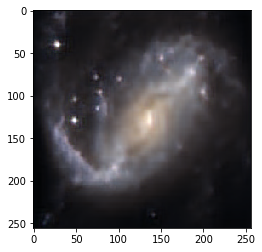

In [157]:
plt.imshow(pred[0].reshape(256,256,3))

In [160]:
pred_1 = model_1.predict(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


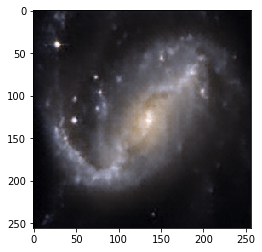

In [161]:
plt.imshow(pred_1[0].reshape(256,256,3))

with more layers, parameters and epochs model accuracy can be improved